# Regresión Lineal

Por: Christian Millán

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## The Boston Housing DataSet

[The Boston Housing DataSet](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) proviene de información obtenida por Servicio de Censo de los Estados Unidos relacionado con casas en el area de Boston. Los siguientes datos describen el dataset:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("boston_housing.csv", header=None, delimiter=r"\s+", names=column_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
print(np.shape(data))

(506, 14)


# Análisis de los datos

In [4]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<function matplotlib.pyplot.show(close=None, block=None)>

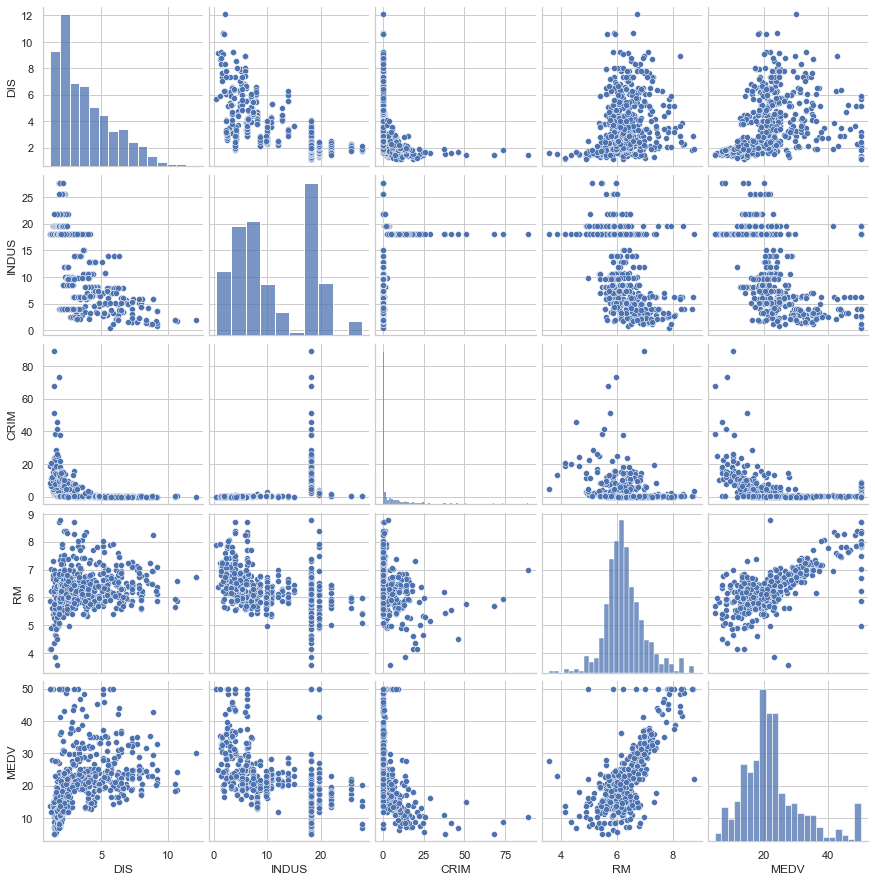

In [5]:
sns.set(style='whitegrid', context='notebook')

cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(data[cols], height=2.5)
plt.show

<AxesSubplot:>

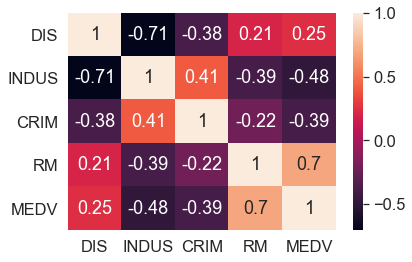

In [6]:
# Crear matriz de correlación (correlation matrix)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

# Otra forma de obtener el mapa de correlación.
#sns.heatmap(data[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.


In [7]:
X = data['RM'].values.reshape(-1, 1)
y = data['MEDV'].values.reshape(-1, 1)

In [8]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [9]:
lr = LinearRegression()
lr.fit(X_std, y_std)

LinearRegression()

In [10]:
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

## Análisis de resultados

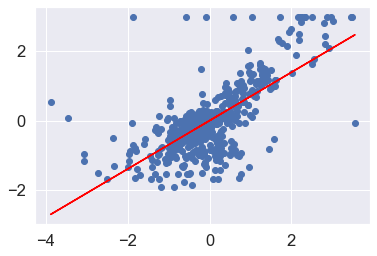

In [11]:
plt.scatter(X_std, y_std)
plt.plot(X_std, lr.predict(X_std), color='Red')
#plt.ylabel('Mediana del precio en miles[MEDV]')
#plt.xlabel('Promedio de habitaciones [RM]')

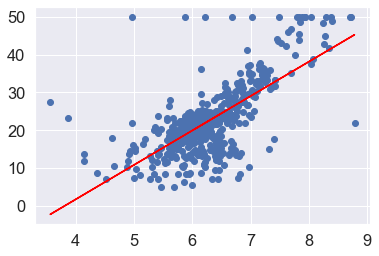

In [12]:
plt.scatter(X, y)
plt.plot(X, lr2.predict(X), color='Red')
#plt.ylabel('Mediana del precio en miles[MEDV]')
#plt.xlabel('Promedio de habitaciones [RM]')

In [13]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

print('El precio de una casa 5 habitaciones:', sc_y.inverse_transform(lr.predict(num_habitaciones_std)))



El precio de una casa 5 habitaciones: [[10.83992413]]


In [14]:
num_habitaciones = 5

print('El precio de una casa 5 habitaciones:', lr2.predict(np.array([num_habitaciones]).reshape(-1,1)))


El precio de una casa 5 habitaciones: [[10.83992413]]


## Regresion lineal multivariable

Se agrega una variable adicional al modelo (debe existir una correlación)

In [15]:
X = data[['RM', 'INDUS']].values
y = data['MEDV'].values.reshape(-1, 1)

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [17]:
mlr = LinearRegression()
mlr.fit(X_std, y_std)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

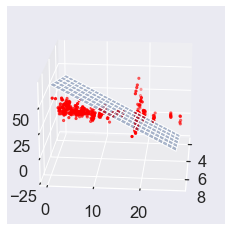

In [20]:
x1_range = np.arange(data['RM'].min(), data['RM'].max())
x2_range = np.arange(data['INDUS'].min(), data['INDUS'].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({'RM':X1.ravel(), 'INDUS':X2.ravel()})

pred = mlr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(data['RM'], data['INDUS'], data['MEDV'], color='Red', marker='.')
ax.view_init(elev=20, azim=5)
plt.show